In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
import itertools
import numpy as np

from results import load_results, general_stats, pretty_highest_ind
import plot

plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (4.8/2, 3/2),
    'text.usetex': True,
    'font.size': 10,
    'ytick.labelsize': 6,
    'xtick.labelsize': 6,
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'lines.markersize': 5,
    'lines.linewidth': 1,
    'errorbar.capsize': 2
})

# Starting on a 2-hypergraph

In [2]:
h2_run_ids = ['aircraft_fuel_20211004']
h2_find2, h2_findq, ind_find2, ind_findq = load_results(h2_run_ids, return_inds=True)
findq_subset = [(0.05, 1.00, 0), (0.10, 1.00, 0), (0.05, 1.00, 1)]

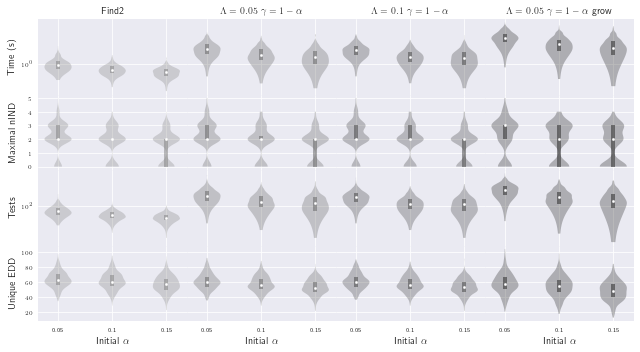

In [3]:
fig = plot.plot_comparison(h2_find2, h2_findq, findq_subset)

In [4]:
#fig.savefig('/home/aalvarez/Downloads/aircraft.pdf')

In [5]:
h2_stats = general_stats(h2_find2, h2_findq)
h2_stats

,Method,Lambda,Gamma,Time Q1,Time Q3,Match Q1,Match Q3,Card Q1,Card Q3,Precision,Overhead,N,Timeouts
0,Find2,NaN,NaN,0.633572,0.905964,0.073848,0.113636,54.00,69.00,0.961932,1.075046,400,0.0
2,FindQ 0,0.05,0.9,1.207038,2.160358,0.086957,0.125000,50.00,64.00,0.550225,2.270469,400,0.0
1,FindQ 0,0.10,0.9,1.120499,1.893287,0.086957,0.125000,50.00,64.25,0.592217,2.037474,400,0.0
3,FindQ 1,0.05,0.9,1.985300,3.487948,0.088889,0.131579,45.75,63.00,0.442697,2.926024,400,0.0
4,FindQ 1,0.10,0.9,1.960544,3.429133,0.088889,0.128205,45.75,63.25,0.459309,2.800923,400,0.0


In [6]:
files = [
    'Scenario_Normal.csv',
    'Scenario_One.csv',
    'Scenario_Two.csv',
    'Scenario_Three.csv',
    'Scenario_Four.csv'
]
initial_alpha = 0.10

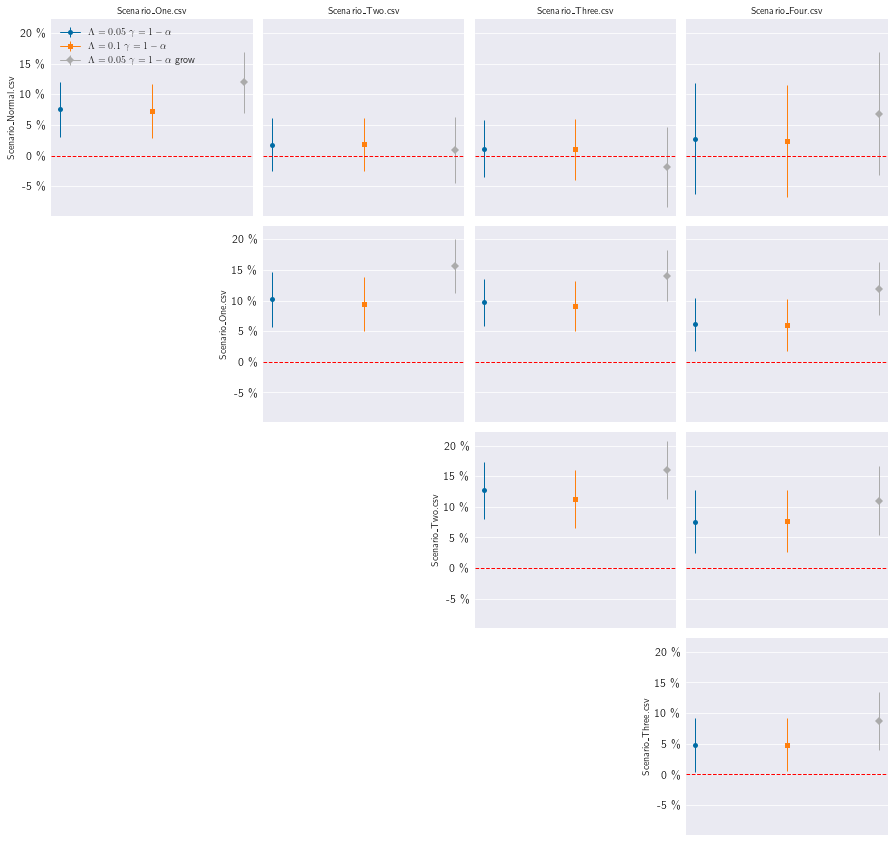

In [7]:
cycler = plot.StyleCycler(['o', 's', 'D', '*'], ['--'],  plt.rcParams['axes.prop_cycle'])
f2mask = h2_find2['bootstrap_alpha'] == initial_alpha
f2 = h2_find2[f2mask]

fig = plt.figure(figsize=(15, 15))
grid = gridspec.GridSpec(nrows=len(files)-1, ncols=len(files)-1, hspace=0.05, wspace=0.05)

ax = None
for i, fa in enumerate(files):
    for j, fb in enumerate(files[i+1:], start=i):
        ax = fig.add_subplot(grid[i, j], sharey=ax)
        if i == 0:
            ax.set_title(fb.replace('_', '\\_'))
        if j == i:
            ax.set_ylabel(fa.replace('_', '\\_'))
        else:
            plt.setp(ax.get_yticklabels(), visible=False)
            
        column = f'max_{fa}_{fb}'
        if column not in f2:
            column = f'max_{fb}_{fa}'
        ref_ind = f2[column]
        
        fqmask = dict()
        for k in findq_subset:
            fqmask[k] = h2_findq[k]['bootstrap_alpha'] == initial_alpha
        
        for (fqi, key), (marker, _, color) in zip(enumerate(findq_subset, start=1), cycler):
            fqdf = h2_findq[key][fqmask[key]]
            v = fqdf[column]
            label = plot.readable_key(*key).replace('_', '\\_')
            plot.plot_confidence(ax, fqi, v, ref=ref_ind, label=label, marker=marker, color=color)

        ax.axhline(0, linestyle='--', c='red')
        if i == j and i == 0:
            ax.legend()

In [8]:
#fig.savefig('/home/aalvarez/Downloads/Plots/bootstrap_aircraft.eps', bbox_inches='tight')

In [9]:
pretty_highest_ind(ind_find2, topn=3)

[  Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6              FTV_S            FTV_S,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF]

In [10]:
pretty_highest_ind(ind_findq[(0.05, 1., 0)], topn=3)

[  Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6              FTV_S            FTV_S,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF]

In [11]:
pretty_highest_ind(ind_findq[(0.1, 1., 1)], topn=3)

[  Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF              FTF
 5                FTL              FTL
 6              FTV_S            FTV_S,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF              CLF
 1              CLV_S            CLV_S
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF,
   Scenario_Three.csv Scenario_Two.csv
 0                CLF            CLV_S
 1              CLV_S              CLF
 2               CRTT             CRTT
 3                CTL              CTL
 4                FTF            FTV_S
 5                FTL              FTL
 6              FTV_S              FTF]

In [12]:
matrix = np.full((len(files)-1, len(files)-1), np.nan)

for i, fa in enumerate(files):
    for j, fb in enumerate(files[i+1:], start=i):
        column = f'max_{fa}_{fb}'
        if column not in f2:
            column = f'max_{fb}_{fa}'
        ref_ind = f2[column]
        
        matrix[i,j] = ref_ind.max()

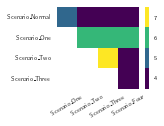

In [13]:
plt.figure()
cmap = cm.get_cmap('viridis', 4)
cmap.set_bad(color='white')
plt.imshow(matrix, cmap=cmap, vmin=np.nanmin(matrix), vmax=np.nanmax(matrix))
plt.yticks(list(range(len(files)-1)), labels=[f.split('.')[0].replace('_', '\_') for f in files[:-1]])
plt.xticks(list(range(len(files)-1)), labels=[f.split('.')[0].replace('_', '\_') for f in files[1:]], rotation=30)
cbar = plt.colorbar(ticks=np.linspace(np.nanmin(matrix)+0.4, np.nanmax(matrix)-0.4, 4))
cbar.ax.set_yticklabels(np.arange(np.nanmin(matrix), np.nanmax(matrix)+1, dtype=int))
plt.grid(False)
plt.savefig('/home/aalvarez/Downloads/afds.eps', bbox_inches='tight')